<a href="https://colab.research.google.com/github/inuinsane/latihanML_batuGuntingKertas/blob/main/latihanML_batuGuntingKertas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Biodata Singkat**

1.   Nama lengkap: Abdullah Ibnu hasan
2.   Username: [abdullahibnuhasan](https://www.dicoding.com/users/abdullahibnuhasan)
3.   Email: inuinsane@gmail.com
4.   Alamat saat ini: Jorong, Tanah Laut, Kalimantan Selatan

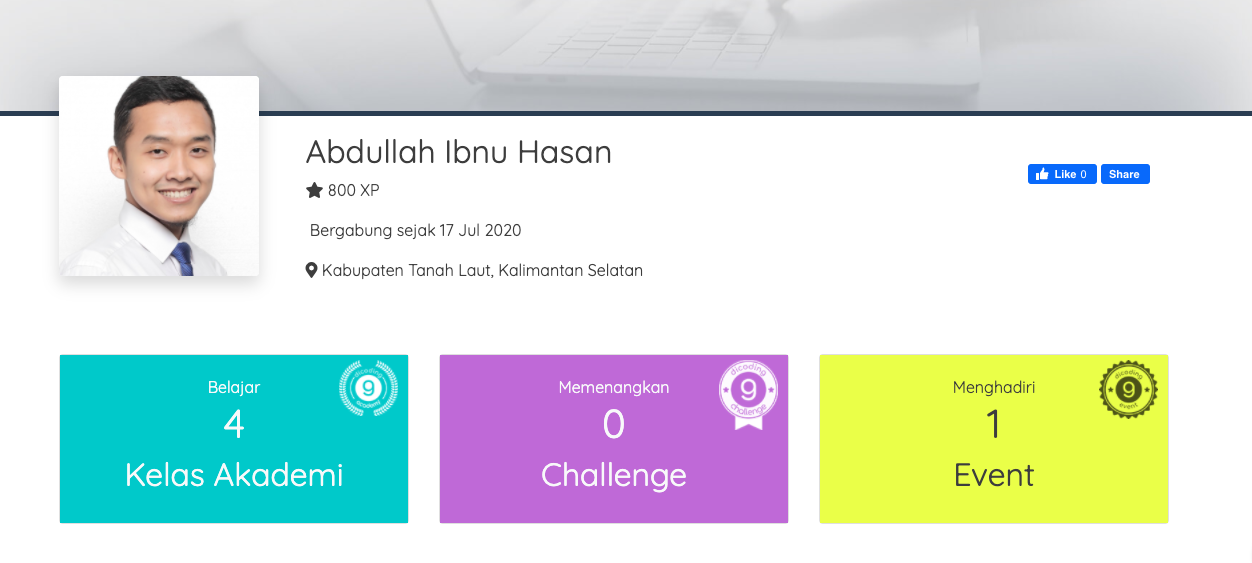



### **Alur yang digunakan pada project ini:**
1. Import Library
2. Download Dataset
3. Membagi dataset menjadi 2 (training: 60%, validation:40%)
4. Membuat image data generator
5. Membuat model sequential

**Catatan**
- Training tidak boleh lebih dari 30 menit
- Akurasi minimal 85%
- Bisa melakukan prediksi berdasarkan gambar / foto yang diupload

In [ ]:
#1 import library
import tensorflow as tf

In [ ]:
#2 download dataset
!wget --no-check-certificate 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip' -O /tmp/rockpaperscissors.zip

--2020-11-02 13:10:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  35.4MB/s    in 9.6s    

2020-11-02 13:10:49 (32.0 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
#ekstraksi file zip dataset
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#menyiapkan folder untuk data yang sudah dipisah
base_dir = '/tmp/rockpaperscissors/split'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
#3 Membagi dataset menjadi 2 bagian
!pip install split-folders
import splitfolders
splitfolders.ratio('/tmp/rockpaperscissors/rps-cv-images', 
                    output='/tmp/rockpaperscissors/split',
                    seed=1337,
                    ratio=(.6, .4))


Copying files: 2188 files [00:00, 2829.79 files/s]


In [ ]:
# #membuat folder untuk data training
# train_rock_dir = os.path.join(train_dir, 'rock')
# train_paper_dir = os.path.join(train_dir, 'paper')
# train_scissors_dir = os.path.join(train_dir, 'scissors')
 
# #membuat folder untuk data validasi
# validation_rock_dir = os.path.join(validation_dir, 'rock')
# validation_paper_dir = os.path.join(validation_dir, 'paper')
# validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
#4 membuat image data generator
#import library terlebih dahulu
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
# membuat train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='categorical')

#menggunakan class_mode=categorical karena kasusnya adalah klasifikasi 3 kelas

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
#5 membuat sequential model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax') #3 kelas
])


In [ ]:
#jangan pernah lupa compile model yang telah dibuat
model.compile(loss = 'categorical_crossentropy', #karena kasusnya klasifikasi 3 kelas
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
#melakukan training dengan model.fit
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
25/25 - 45s - loss: 0.9738 - accuracy: 0.5325 - val_loss: 0.7228 - val_accuracy: 0.7188
Epoch 2/20
25/25 - 44s - loss: 0.4567 - accuracy: 0.8338 - val_loss: 0.3317 - val_accuracy: 0.8500
Epoch 3/20
25/25 - 44s - loss: 0.2992 - accuracy: 0.8863 - val_loss: 0.1786 - val_accuracy: 0.9312
Epoch 4/20
25/25 - 44s - loss: 0.1935 - accuracy: 0.9337 - val_loss: 0.2020 - val_accuracy: 0.9312
Epoch 5/20
25/25 - 44s - loss: 0.1909 - accuracy: 0.9350 - val_loss: 0.2098 - val_accuracy: 0.9312
Epoch 6/20
25/25 - 44s - loss: 0.1893 - accuracy: 0.9300 - val_loss: 0.2404 - val_accuracy: 0.9000
Epoch 7/20
25/25 - 44s - loss: 0.1021 - accuracy: 0.9625 - val_loss: 0.1089 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 44s - loss: 0.1060 - accuracy: 0.9600 - val_loss: 0.2047 - val_accuracy: 0.9250
Epoch 9/20
25/25 - 44s - loss: 0.1097 - accuracy: 0.9638 - val_loss: 0.0675 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 43s - loss: 0.1063 - accuracy: 0.9563 - val_loss: 0.1310 - val_accuracy: 0.9625
Epoch 11/

Saving qblMZUcJN3odjQlm.png to qblMZUcJN3odjQlm.png
qblMZUcJN3odjQlm.png
gunting


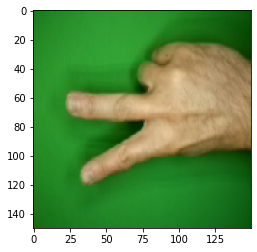

In [ ]:
#prediksi melalui gambar yang di-upload

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  #menampilkan gambar yang telah diupload
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  #prediksi gambar
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  #menampilkan hasil prediksi
  if classes[0,0] !=0:
    print('kertas')
  elif classes[0,1] !=0:
    print('batu')
  else:
    print('gunting')